In this notebook you will complete and submit some of the exercises from the the in class notebooks from Day 19 (time series), Day 20 ($k$-means clustering), and Day 21 (hierarchical clustering).

## Austin Weather

**This is the Austin Weather exercise from the [Day 19 in class notebook](https://colab.research.google.com/drive/1Ink3ORPg_0r8qQDdf6wnKaF2hurkZJ7R?usp=sharing). If you already completed that notebook, you can just copy your work here.**

The Austin weather data set (https://dlsun.github.io/pods/data/austin_weather_2019.csv ) contains hourly measurements of the weather in Austin, TX in 2019. This data set was collected from the [NOAA](https://www.ncdc.noaa.gov/crn/qcdatasets.html). See the [data documentation](https://www1.ncdc.noaa.gov/pub/data/uscrn/products/hourly02/README.txt) for more information.

1\. Read in the data set. The date of the measurement is contained in **LST_DATE**, the time in **LST_TIME**, and the  Plot the hourly temperature (degrees Celsisu) in **T_HR_AVG**. Convert the date and time columns into a single Pandas `datetime` and set that column as the index.

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
# read in the data
df_weather = pd.read_csv("https://dlsun.github.io/pods/data/austin_weather_2019.csv")

df_weather['LST_DATE'] = df_weather['LST_DATE'].astype(str)
df_weather['LST_TIME'] = df_weather['LST_TIME'].astype(str)

df_weather['LST_DATE'] = df_weather['LST_DATE'].str.pad(8, side='left', fillchar='0')
df_weather['LST_TIME'] = df_weather['LST_TIME'].str.pad(4, side='left', fillchar='0')


df_weather['Date'] = pd.to_datetime(df_weather['LST_DATE'] + df_weather['LST_TIME'], format='%Y%m%d%H%M')
df_weather.set_index('Date', inplace=True)
df_weather.head()


,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,CRX_VN,LONGITUDE,LATITUDE,T_CALC,T_HR_AVG,...,SOIL_MOISTURE_5,SOIL_MOISTURE_10,SOIL_MOISTURE_20,SOIL_MOISTURE_50,SOIL_MOISTURE_100,SOIL_TEMP_5,SOIL_TEMP_10,SOIL_TEMP_20,SOIL_TEMP_50,SOIL_TEMP_100
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31 19:00:00,23907,20190101,100,20181231,1900,2.623,-98.08,30.62,12.6,12.7,...,0.508,0.500,-99.0,-99.0,-99.0,10.0,10.1,-9999.0,-9999.0,-9999.0
2018-12-31 20:00:00,23907,20190101,200,20181231,2000,2.623,-98.08,30.62,11.1,11.6,...,0.507,0.496,-99.0,-99.0,-99.0,9.8,9.9,-9999.0,-9999.0,-9999.0
2018-12-31 21:00:00,23907,20190101,300,20181231,2100,2.623,-98.08,30.62,11.8,12.0,...,0.506,0.493,-99.0,-99.0,-99.0,9.6,9.7,-9999.0,-9999.0,-9999.0
2018-12-31 22:00:00,23907,20190101,400,20181231,2200,2.623,-98.08,30.62,12.0,11.9,...,0.503,0.490,-99.0,-99.0,-99.0,9.3,9.6,-9999.0,-9999.0,-9999.0
2018-12-31 23:00:00,23907,20190101,500,20181231,2300,2.623,-98.08,30.62,11.4,11.4,...,0.501,0.489,-99.0,-99.0,-99.0,9.1,9.4,-9999.0,-9999.0,-9999.0


2\. Create a line plot of temperature over time. Notice any problems? Why do you think this occurs?

<Axes: title={'center': 'Temperature over time'}, xlabel='Date'>

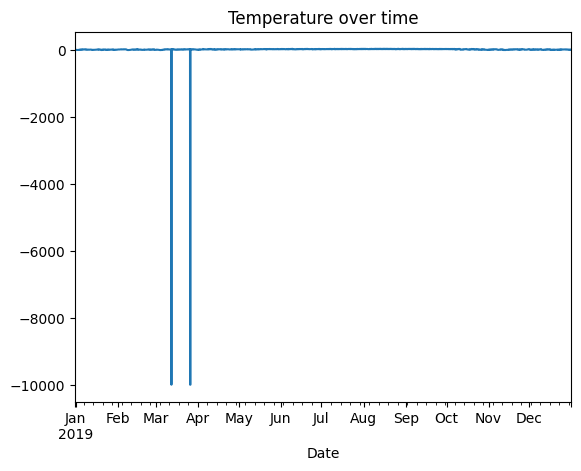

In [229]:
df_weather["T_HR_AVG"].plot(title="Temperature over time")

There seems to be values missing and set as -9999.0. This might happen because the data set is a collection of hourly measurements, and not all hours are represented.

3\. Fix the missing values and redo the line plot. Describe what you see.

<Axes: title={'center': 'Temperature over time'}, xlabel='Date'>

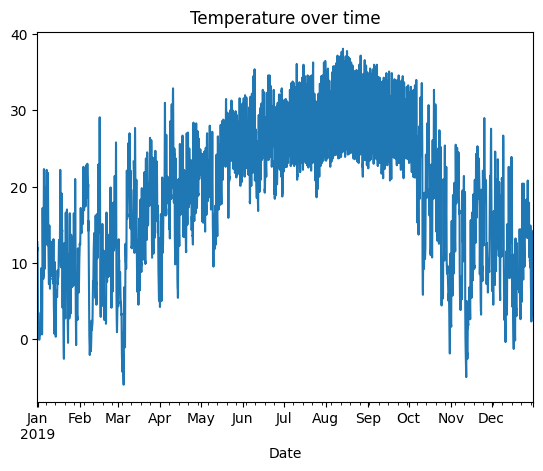

In [230]:
df_weather[df_weather["T_HR_AVG"] == df_weather["T_HR_AVG"].min()]

import numpy as np
df_weather["T_HR_AVG"].replace(-9999, np.nan, inplace=True)

# plot the hourly average temperature
df_weather["T_HR_AVG"].plot(title="Temperature over time")


From the plot, we can see that the temperature is highest in the summer and lowest in the winter. Looks like from the hourly Some of the lowest temperatures also occur in the spring (March).

4\. The hourly temperature plot is extremely noisy. Plot the daily average temperature, and then the weekly average temperature. What is the advantage of these plots?

<Axes: title={'center': 'Daily average temperature'}, xlabel='Date'>

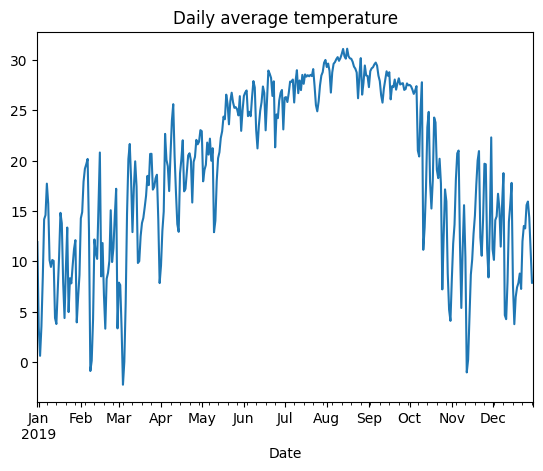

In [231]:
df_weather["T_HR_AVG"].resample('D').mean().plot(title="Daily average temperature")

<Axes: title={'center': 'Weekly average temperature'}, xlabel='Date'>

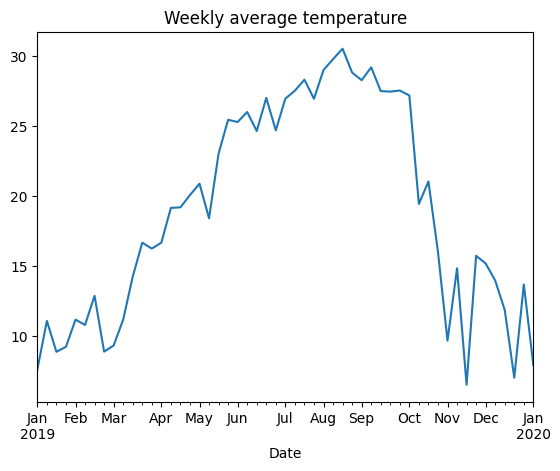

In [232]:
df_weather["T_HR_AVG"].resample('W').mean().plot(title="Weekly average temperature")

The advantage of these plots is that they are less noisy and easier to see the overall trend of the temperature over time. We can better see the seasonal trend of the temperature.

5\. Model the overall trend using a polynomial. Create a plot of the hourly data with the trend superimposed. Hint: you'll need to convert datetimes to decimal like in the reading, but now we're dealing with hourly data.

In [233]:
# dropping na values
df_weather.isna().sum()

df_weather.dropna(inplace=True)

df_weather.isna().sum()

y_train = df_weather["T_HR_AVG"]

y_train.shape

(8752,)

In [234]:
date = df_weather.index
t = date.year + ((30 * (date.month - 1) + date.day) / 365) + ((date.hour / 24) / 365)
t

Float64Index([ 2018.991210045662, 2018.9913242009131, 2018.9914383561643,
              2018.9915525114154, 2018.9916666666666, 2019.0027397260274,
              2019.0028538812785, 2019.0029680365296, 2019.0030821917808,
               2019.003196347032,
              ...
              2019.9900684931506, 2019.9901826484017, 2019.9902968036529,
               2019.990410958904, 2019.9905251141552, 2019.9906392694063,
              2019.9907534246574, 2019.9908675799086, 2019.9909817351597,
              2019.9910958904109],
             dtype='float64', name='Date', length=8752)

In [235]:
t.to_frame().shape

(8752, 1)

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(t.to_frame())

array([[2.01899121e+03, 4.07632551e+06],
       [2.01899132e+03, 4.07632597e+06],
       [2.01899144e+03, 4.07632643e+06],
       ...,
       [2.01999087e+03, 4.08036311e+06],
       [2.01999098e+03, 4.08036357e+06],
       [2.01999110e+03, 4.08036403e+06]])

<Axes: title={'center': 'Temperature over time (with trend)'}, xlabel='Date'>

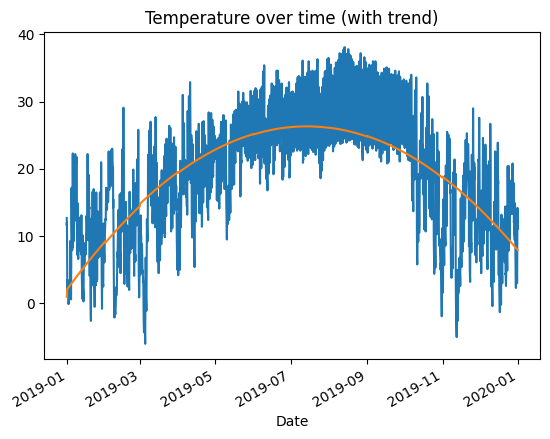

In [237]:
from sklearn.pipeline import make_pipeline

# create a pipeline that first transforms the data to include
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

pipeline.fit(t.to_frame(), y_train)

# plot the data
y_train_ = pd.Series(
    pipeline.predict(t.to_frame()),
    index=y_train.index
)

y_train.plot.line(title="Temperature over time")
y_train_.plot.line(title="Temperature over time (with trend)")


6\. Use your model to forecast the average temperature on January 1, 2020 at midnight in Austin, TX.

In [238]:
# predict the temperature on January 1, 2020 at 12:00 AM
t_pred = pd.Series([2020 + (30 * (1 - 1) + 1 / 365 + 0 / 24)])
t_pred

y_pred = pipeline.predict(t_pred.to_frame())
y_pred

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([6.99152768])

The average temperature on January 1, 2020 at midnight in Austin, TX is 6.99 degrees Celsius.

7\. Now fit a model that includes both the polynomial trend and a seasonal component for the daily fluctuations in temperature. Create a plot of the hourly data with the trend superimposed.

Text(0.5, 1.0, 'Temperature over time (with trend)')

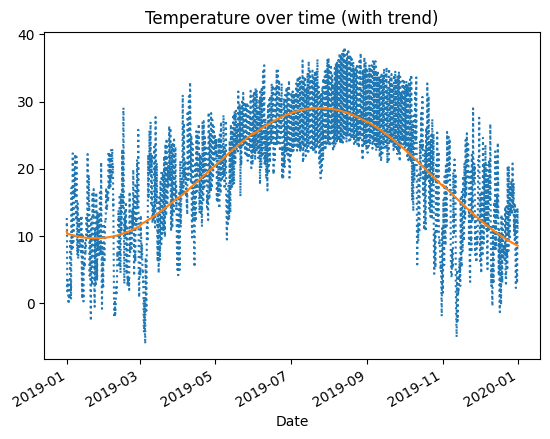

In [239]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union

# Fit linear regression on t, t^2, sin(2 * pi * t), cos(2 * pi * t)
pipeline = make_pipeline(
    make_union(
        PolynomialFeatures(degree=2, include_bias=False),
        FunctionTransformer(lambda t: np.sin(2 * np.pi * 1 * t)),
        FunctionTransformer(lambda t: np.cos(2 * np.pi * 1 * t))
    ),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()
# add a title
plt.title("Temperature over time (with trend)")

8\. Use the revised model to forecast the average temperature on January 1, 2020 at midnight in Austin, TX.

In [240]:
pipeline.predict(t_pred.to_frame())

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([8.22728548])

With this revised model with a seasonal component, the predicted temperature for January 1, 2020 at midnight in Austin, TX is 8.23 degrees Celsius.

## Titanic Data

**This is the Titainic data exercise from the Day 20 in class notebook. If you already completed that notebook, you can just copy your work here. HOWEVER, see the question below about summarizing your cluster profiles.**

Use $k$-means to cluster the Titanic passengers into $k$ clusters. You are free to choose the number of clusters $k$, but try at least two different values of $k$. You are also free to choose the features to include, but be sure to include both categorical and quantitative features.

Summarize the results to create "profiles" of the passengers in each cluster. Can you come up with an "interpretation" of each cluster based on the passengers in it?

Note: before we have classified the passengers based on whether or not they survived, but here we are just trying to cluster the passengers; we're not necessarily trying to predict whether they survived or died.

In [241]:
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [242]:
# read in the data
df_titanic = pd.read_csv("https://dlsun.github.io/pods/data/titanic.csv ")

df_titanic = df_titanic.dropna(subset = ["age"])

In [243]:
selected_features = ['gender', 'age', 'class', 'embarked', 'fare', 'survived']
df_cluster = df_titanic[selected_features].fillna(0)

# Separate features into numerical and categorical
numerical_features = ['age', 'fare']
categorical_features = ['gender', 'class', 'embarked', 'survived']

# Create a column transformer to preprocess numerical and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# 3 CLUSTERS
# Build the k-means clustering pipeline
kmeans_pipeline = make_pipeline(
    preprocessor,
    KMeans(n_clusters=3)
)

# Fit the k-means model
df_cluster['cluster'] = kmeans_pipeline.fit_predict(df_cluster)

# Summarize the results and create profiles for each cluster
cluster_profiles = df_cluster.groupby('cluster').mean()

print(f"\nResults for k=3 clusters:")
print(cluster_profiles)


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




Results for k=3 clusters:
               age        fare  survived
cluster                                 
0        22.074710   11.265095  0.340119
1        40.464853   10.075168  0.217687
2        37.478588  145.439987  0.819444


/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_12241/693015586.py:27: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: title={'center': 'Clusters of Age and Class (k=3)'}, xlabel='age', ylabel='class'>

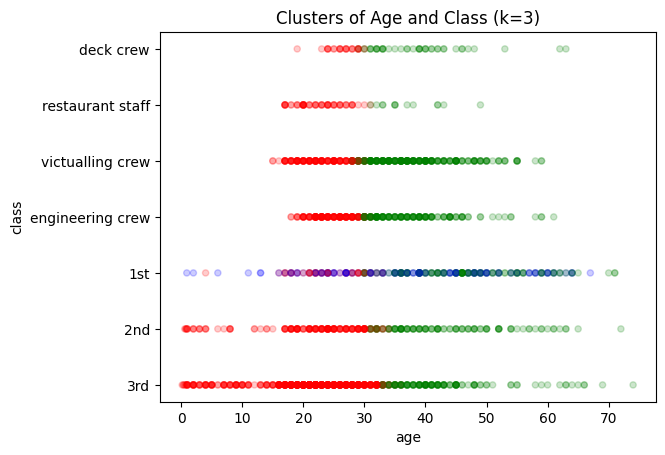

In [244]:
# plot age vs class for the 3 clusters
clusters = pd.Series(kmeans_pipeline.named_steps['kmeans'].labels_).map({
    0: "red",
    1: "green",
    2: "blue",
})
df_cluster.plot.scatter(x="age", y="class",
                     c=clusters, alpha=0.2,
                        title="Clusters of Age and Class (k=3)")

<Axes: title={'center': 'Clusters of Age and Fare (k=3)'}, xlabel='age', ylabel='fare'>

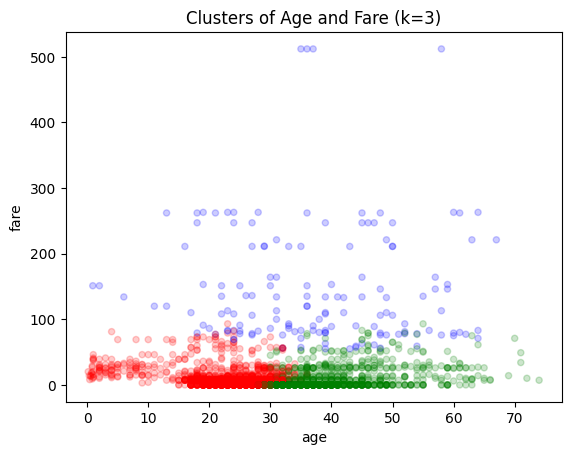

In [245]:
# plot age vs fare for the 3 clusters
df_cluster.plot.scatter(x="age", y="fare",
                     c=clusters, alpha=0.2,
                        title="Clusters of Age and Fare (k=3)")

In [246]:
# 5 CLUSTERS
kmeans_pipeline = make_pipeline(
    preprocessor,
    KMeans(n_clusters=5)
)

# Fit the k-means model
df_cluster['cluster'] = kmeans_pipeline.fit_predict(df_cluster)

# Summarize the results and create profiles for each cluster
cluster_profiles = df_cluster.groupby('cluster').mean()

print(f"\nResults for k=5 clusters:")
print(cluster_profiles)


Results for k=5 clusters:
               age        fare  survived
cluster                                 
0        22.441378   14.481981  0.000000
1        24.433847   17.833781  1.000000
2        28.889045    3.125205  0.000000
3        47.675115   21.424978  0.308756
4        35.947650  200.528329  0.743590


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_12241/2961243483.py:11: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: title={'center': 'Clusters of Age and Class (k=5)'}, xlabel='age', ylabel='class'>

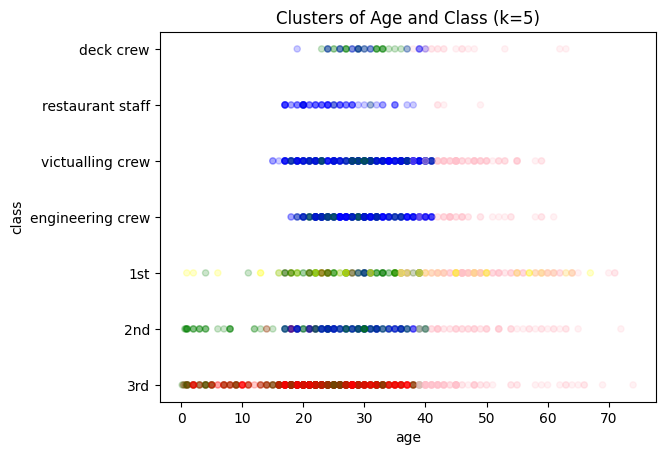

In [247]:
# plot age vs class for the 5 clusters
clusters = pd.Series(kmeans_pipeline.named_steps['kmeans'].labels_).map({
    0: "red",
    1: "green",
    2: "blue",
    3: "pink",
    4: "yellow"
})
df_cluster.plot.scatter(x="age", y="class",
                     c=clusters, alpha=0.2,
                        title="Clusters of Age and Class (k=5)")

<Axes: title={'center': 'Clusters of Age and Fare (k=5)'}, xlabel='age', ylabel='fare'>

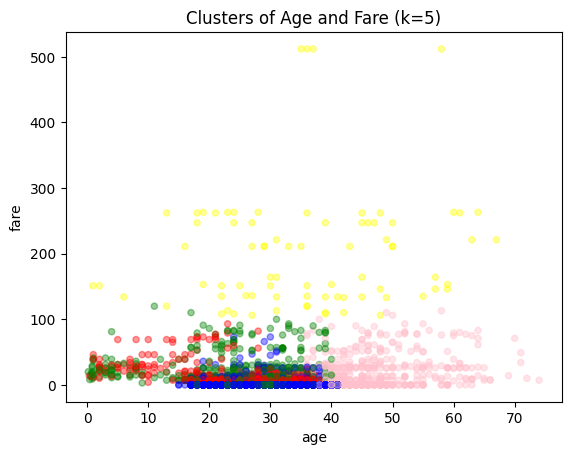

In [248]:
df_cluster.plot.scatter(x="age", y="fare",
                     c=clusters, alpha=0.4,
                        title="Clusters of Age and Fare (k=5)")

**WRITE A SHORT PARAGRAPH SUMMARIZING IN CONTEXT YOUR CLUSTER PROFILES HERE. BE SURE TO THAT YOUR INTERPRETATIONS ARE SUPPORTED WITH RELEVANT DESCRIPTIVE STATISTICS (PLOTS, TABLES, ETC)**



Using KMeans clustering, we chose age, fare, and class as the important features in our analysis among all the features. From the cluster profiles, we can see that with k = 3 has more visible distinctions between the clusters in the graphs. It seems that the the clusters for age vs fare at k = 3 are broken down by age for the first 2 clusters and the last cluster encompasses all ages with higher fares. From this table below, we can see that the first and third cluster have similar fares but the ages are different. The second cluster has the highest fare, and also it seems that in this cluster the passengers survived the most.

| Cluster | Age | Fare | Survived |
|---------|-----|------|----------|
| 0       | 22.074710  | 11.265095   | 0.340119 |
| 1       | 37.478588   | 145.439987   | 0.819444 |
| 2       | 40.464853    | 10.075168   | 0.217687 |

For k = 5, there were not as many visible distinctions between the clusters in the graphs. It seems that the first 3 clusters for age vs fare at k = 5 are broken down by lowest fares, then the next cluster is for higher ages, and the the last cluster is for the highest fares, at the top of the graph.

## Ames Housing Data

**This is the Ames housing data exercise from the Day 21 in class notebook. If you already completed that notebook, you can just copy your work here. HOWEVER, see the question below about summarizing your cluster profiles.**

Use clustering to cluster the Ames housing data. You should try both $k$-means and hierarchical clustering. You are free to choose the number of clusters, but try at least two different values. You are also free to choose the features to include, but be sure to include both categorical and quantitative features. See the [data documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) for all the variables that are available in the data set. For hierarchical clustering, try at least two different linkages

Summarize the results to create "profiles" of the houses in each cluster. Can you come up with an "interpretation" of each cluster based on the houses in it?

In [249]:
import plotly.express as px

df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")

df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [250]:
df_ames = df_ames[["Lot Area", "Gr Liv Area", "TotRms AbvGrd", "Garage Cars", "SalePrice", "Neighborhood", "Bldg Type"]].dropna()

X_train = df_ames[["Lot Area", "Gr Liv Area", "TotRms AbvGrd", "Garage Cars", "SalePrice", "Neighborhood", "Bldg Type"]]

X_train

,Lot Area,Gr Liv Area,TotRms AbvGrd,Garage Cars,SalePrice,Neighborhood,Bldg Type
0,31770,1656,7,2.0,215000,NAmes,1Fam
1,11622,896,5,1.0,105000,NAmes,1Fam
2,14267,1329,6,1.0,172000,NAmes,1Fam
3,11160,2110,8,2.0,244000,NAmes,1Fam
4,13830,1629,6,2.0,189900,Gilbert,1Fam
...,...,...,...,...,...,...,...
2925,7937,1003,6,2.0,142500,Mitchel,1Fam
2926,8885,902,5,2.0,131000,Mitchel,1Fam
2927,10441,970,6,0.0,132000,Mitchel,1Fam
2928,10010,1389,6,2.0,170000,Mitchel,1Fam


### K-means

#### k = 4

In [251]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED

preprocessor = make_column_transformer(
    (StandardScaler(), ['Lot Area', 'Gr Liv Area', 'TotRms AbvGrd', 'Garage Cars', 'SalePrice']),
    (OneHotEncoder(handle_unknown="ignore"),
     ['Neighborhood', 'Bldg Type'])
)

kmeans_model = make_pipeline(
    preprocessor,
    KMeans(n_clusters=4)
)

kmeans_model.fit(X_train)


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Lot Area', 'Gr Liv Area',
                                                   'TotRms AbvGrd',
                                                   'Garage Cars',
                                                   'SalePrice']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'Bldg Type'])])),
                ('kmeans', KMeans(n_clusters=4))])

In [252]:
labels_ = kmeans_model.named_steps["kmeans"].labels_

labels_

array([2, 0, 0, ..., 0, 2, 1], dtype=int32)

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

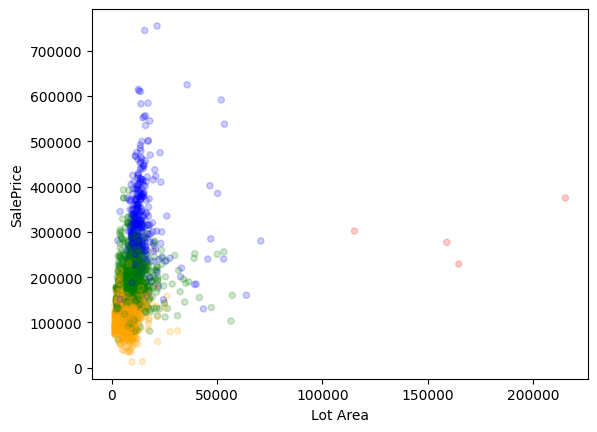

In [253]:
clusters = pd.Series(labels_).map({
    0: "orange",
    1: "blue",
    2: "green",
    3: "red"
})

df_ames.plot.scatter(x="Lot Area", y="SalePrice",
                        c=clusters, alpha=0.2)

In [254]:
neigh_plot = X_train
neigh_plot["cluster"] = clusters
merged = neigh_plot.groupby(["Neighborhood", "cluster"])["SalePrice"].mean().reset_index()
px.bar(merged, x="Neighborhood", y="SalePrice", color="cluster")

#### k = 2

In [255]:

kmeans_model = make_pipeline(
    preprocessor,
    KMeans(n_clusters=2)
)

kmeans_model.fit(X_train)

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Lot Area', 'Gr Liv Area',
                                                   'TotRms AbvGrd',
                                                   'Garage Cars',
                                                   'SalePrice']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'Bldg Type'])])),
                ('kmeans', KMeans(n_clusters=2))])

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

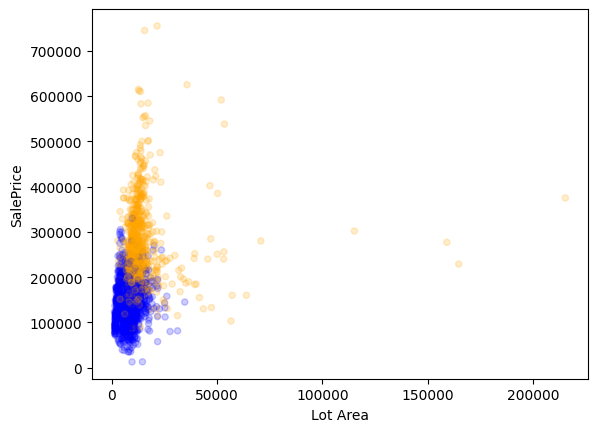

In [256]:
labels_ = kmeans_model.named_steps["kmeans"].labels_

clusters = pd.Series(labels_).map({
    0: "orange",
    1: "blue"
})

df_ames.plot.scatter(x="Lot Area", y="SalePrice",
                        c=clusters, alpha=0.2)

In [257]:
neigh_plot = X_train
neigh_plot["cluster"] = clusters
merged = neigh_plot.groupby(["Neighborhood", "cluster"])["SalePrice"].mean().reset_index()
px.bar(merged, x="Neighborhood", y="SalePrice", color="cluster")

### Hierarchical

In [258]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import cut_tree

#### Single Linkage

In [259]:
X_scale = preprocessor.fit_transform(X_train).toarray()

# single linkage
hc_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")

hc_single.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

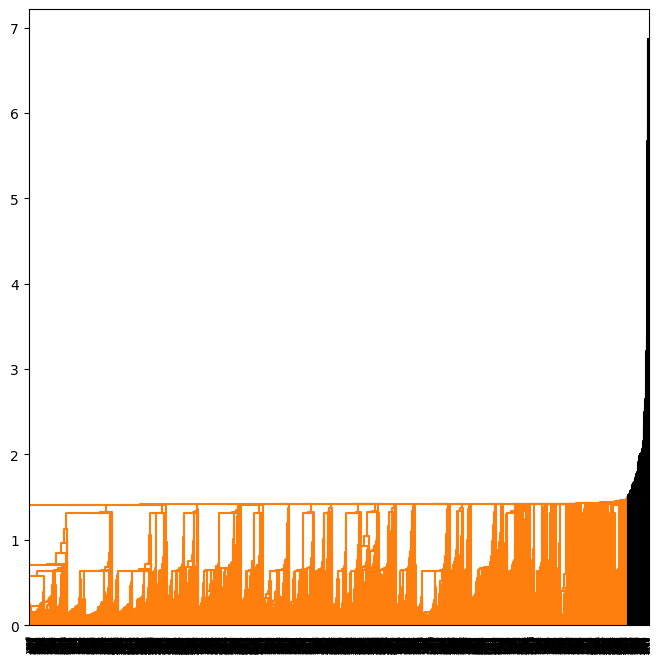

In [260]:
linkage_single_scale = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single_scale,
           ax=ax,
           color_threshold=1.5,
           above_threshold_color='black');

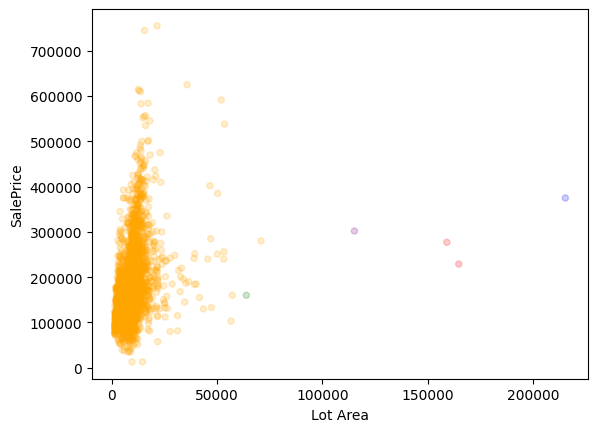

In [261]:
clusters = pd.Series(cut_tree(linkage_single_scale, n_clusters=5).T[0]).map({
    0: "orange",
    1: "blue",
    2: "green",
    3: "red",
    4: "purple"
})

X_train.plot.scatter(x="Lot Area", y="SalePrice",
                     c=clusters, alpha=0.2);

#### Complete Linkage

In [262]:
# complete linkage
hc_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")

hc_complete.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

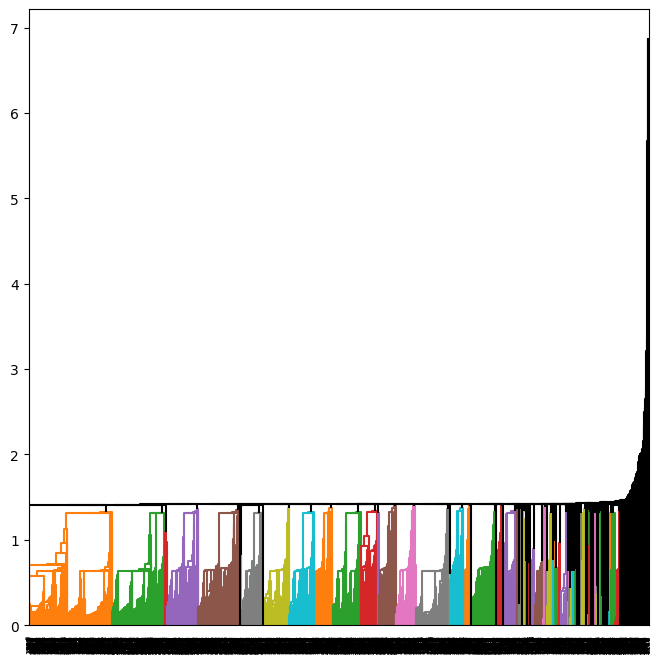

In [263]:
linkage_complete_scale = compute_linkage(hc_complete)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single_scale,
           ax=ax,
           color_threshold=1.4,
           above_threshold_color='black');

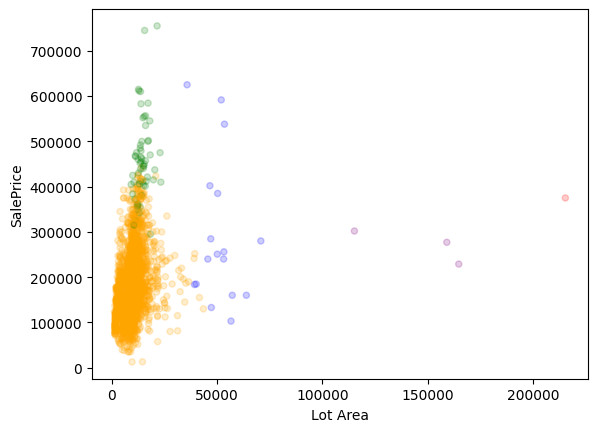

In [264]:
clusters = pd.Series(cut_tree(linkage_complete_scale, n_clusters=5).T[0]).map({
    0: "orange",
    1: "blue",
    2: "green",
    3: "red",
    4: "purple"
})

X_train.plot.scatter(x="Lot Area", y="SalePrice",
                     c=clusters, alpha=0.2);

In [265]:
neigh_hier = X_train
neigh_hier["cluster"] = clusters

px.bar(neigh_hier.groupby(["Neighborhood", "cluster"])["SalePrice"].mean().reset_index(),
       x="Neighborhood",
       y="SalePrice",
       color="cluster",
       color_discrete_map={
        'orange': 'orange',
        'blue': 'blue',
        'green': 'green',
        'red': 'red'
    })

**WRITE A SHORT PARAGRAPH SUMMARIZING IN CONTEXT YOUR CLUSTER PROFILES HERE. BE SURE TO THAT YOUR INTERPRETATIONS ARE SUPPORTED WITH RELEVANT DESCRIPTIVE STATISTICS (PLOTS, TABLES, ETC)**

For the Ames dataset, we chose the neighborhood, lot area, sale price, garage cars, and building type as the important features in our analysis among all the features. From the cluster profiles for KMeans at k = 4, the graph for Lot Area vs Sales Price your can distinct see the 4 different clusters, The first three clusters have similar lto areas but they differ in sale price, ranging from low to high. The fourth and last cluster seems to include housing with just higher lot areas. From the neighborhood breakdown, we found out that the last cluster seems to only include ClearCr and Timber and these are the ones with higher lot area and sale price. From the cluster profiles for hierarchical clustering, complete linkage, the clusters seem to mainly divided by Lot Area. Majority of them are in the orange cluster with them being the least expensive and smaller lot area. There are divisions in clusters between lot area, as seen with the blue, purple, and red cluster. You can also distinctly see th red cluster for Timber in the neighborhood plot.